<a href="https://colab.research.google.com/github/Yoomin99/LIGN167_Stock/blob/main/Copy_of_LIGN167_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIGN 167 Stock prediction Final projects
- https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632
 

Names

Data sources
- https://www.kaggle.com/datasets/kannan1314/amazon-stock-price-all-time
- https://www.kaggle.com/datasets/varpit94/google-stock-data
- https://www.kaggle.com/datasets/akpmpr/updated-netflix-stock-price-all-time

Code sources  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


Data Frame

In [ ]:
Amazon = pd.read_csv("./Amazon.csv")
Amazon['Date'] = pd.to_datetime(Amazon['Date'])
Amazon_2010_2015 = Amazon[~(Amazon['Date'] > '2015-12-31')]
Amazon_2010_2015 = Amazon_2010_2015[~(Amazon_2010_2015['Date'] < '2010-1-1')].reset_index(drop = True)
Amazon_2010_2015

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
1,2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2,2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
3,2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
4,2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500
...,...,...,...,...,...,...,...
1505,2015-12-24,663.349976,664.679993,660.599976,662.789978,662.789978,1091200
1506,2015-12-28,665.559998,675.500000,665.500000,675.200012,675.200012,3783600
1507,2015-12-29,677.979980,696.440002,677.890015,693.969971,693.969971,5735000
1508,2015-12-30,691.890015,695.489990,686.380005,689.070007,689.070007,3519000


In [ ]:
Google = pd.read_csv("./GOOGL.csv")
Google['Date'] = pd.to_datetime(Google['Date'])
Google_2010_2015 = Google[~(Google['Date'] > '2015-12-31')]
Google_2010_2015 = Google_2010_2015[~(Google_2010_2015['Date'] < '2010-1-1')].reset_index(drop = True)
Google_2010_2015

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,532.599976,535.799988,527.880005,529.549988,529.549988,1324000
1,2015-01-05,527.150024,527.989990,517.750000,519.460022,519.460022,2059100
2,2015-01-06,520.500000,521.210022,505.549988,506.640015,506.640015,2722800
3,2015-01-07,510.950012,511.489990,503.649994,505.149994,505.149994,2345900
4,2015-01-08,501.510010,507.500000,495.019989,506.910004,506.910004,3652700
...,...,...,...,...,...,...,...
247,2015-12-24,768.520020,769.200012,764.390015,765.840027,765.840027,520600
248,2015-12-28,770.000000,782.820007,767.729980,782.239990,782.239990,1557800
249,2015-12-29,786.989990,798.690002,786.200012,793.960022,793.960022,1921500
250,2015-12-30,793.960022,796.460022,787.200012,790.299988,790.299988,1428300


In [ ]:
Netflix = pd.read_csv("DataFile/netflix.csv")
Netflix['Date'] = pd.to_datetime(Netflix['Date'])
Netflix_2010_2015 = Netflix[~(Netflix['Date'] > '2015-12-31')]
Netflix_2010_2015 = Netflix_2010_2015[~(Netflix_2010_2015['Date'] < '2010-1-1')].reset_index(drop = True)
Netflix_2010_2015

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.961429,7.565714,7.931429,7.640000,17239600.0,7.640000
1,2010-01-05,7.657143,7.258571,7.652857,7.358571,23753100.0,7.358571
2,2010-01-06,7.672857,7.197143,7.361429,7.617143,23290400.0,7.617143
3,2010-01-07,7.757143,7.462857,7.731429,7.485714,9955400.0,7.485714
4,2010-01-08,7.742857,7.465714,7.498571,7.614286,8180900.0,7.614286
...,...,...,...,...,...,...,...
1505,2015-12-24,118.800003,117.300003,118.220001,117.330002,3531300.0,117.330002
1506,2015-12-28,117.349998,113.849998,117.260002,117.110001,8424300.0,117.110001
1507,2015-12-29,119.599998,116.919998,118.190002,119.120003,8159200.0,119.120003
1508,2015-12-30,119.019997,116.430000,118.949997,116.709999,8149700.0,116.709999


Regession line

In [ ]:
def regressionLine(y):
    days = np.size(y)
    x = []
    for i in range(1,days+1):
        x.append(i)
    x = np.array(x)

    avgX = np.average(x)
    avgY = np.average(y)
    SumX = np.sum(x)
    SumY = np.sum(y)

    xy = 0
    xx = 0
    for i in range(len(x)):
        xy = xy + (x[i]- avgX) * (y[i] - avgY)
        xx = xx + (x[i]- avgX)**2
    
    slope = xy/xx
    b = avgY - slope*avgX
    return (b, slope)




In [ ]:
def plotRegressionLine(df , company, b):
    # plotting the actual points as scatter plot
    y = df["Close"]
    date = df["Date"]
    
    x = []
    for i in range(1, np.size(y) + 1):
        x.append(i)
    x = np.array(x)
    plt.scatter(date, y, color = "m")
  
    # predicted stock price
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(date, y_pred, color = "b")
  
    # putting labels
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(company  + " stock price from 2010 to 2015")
    # function to show plot
    plt.show()

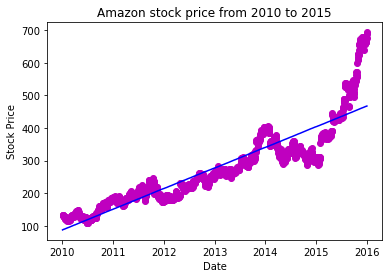

In [ ]:
Amazonb = (regressionLine(Amazon_2010_2015["Close"]))
plotRegressionLine(Amazon_2010_2015,"Amazon", Amazonb)

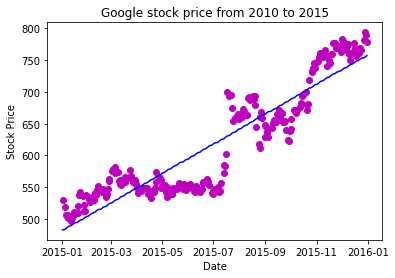

In [ ]:
Googleb = (regressionLine(Google_2010_2015["Close"]))
plotRegressionLine(Google_2010_2015,"Google", Googleb)

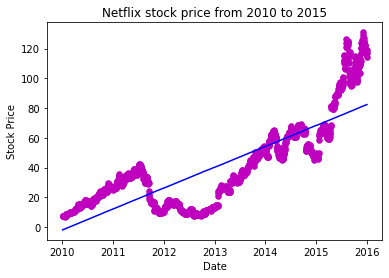

In [ ]:
Netflixb = (regressionLine(Netflix_2010_2015["Close"]))
plotRegressionLine(Netflix_2010_2015,"Netflix", Netflixb)

In [ ]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel , self).__init__()
        self.linear = torch.nn.Linear(1,1)
    def forward(self , x):
        return self.linear(x)


(481.6486377178592, 1.0935934821538211)
tensor(nan, requires_grad=True) tensor(nan, requires_grad=True)


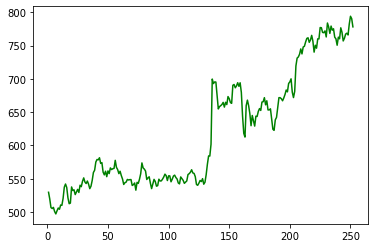

In [ ]:
x = []
for i in range(1, np.size(Google_2010_2015["Close"]) + 1):
    x.append(float(i))
   
x = np.array(x)
y = Google_2010_2015["Close"]

x_torch = torch.FloatTensor(x).reshape(-1,1)
y_torch = torch.FloatTensor(y).reshape(-1,1)

w = torch.tensor(Googleb[1],requires_grad = True)
b = torch.tensor(Googleb[0],requires_grad = True)
lr = 0.01

for i in range(1):
    y_hat = x_torch*w + b
    loss = torch.sum(torch.pow(y_torch - y_hat , 2) / len(y_torch))
    loss.backward()
    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
        w.grad.zero_()
        b.grad.zero_()

y_pred = x_torch*w + b

plt.plot(x_torch, y_torch , 'g')
plt.plot(x_torch, y_pred.detach().numpy(),'b')


logistic regression linear
# 

LSTM
# Pytorch

GRU
# pytorch